# Download Dataset

In [4]:
!pip install -q kaggle
import os
import zipfile

In [ ]:
import shutil

kaggle_json_path = 'kaggle.json'
kaggle_dir = os.path.expanduser('~/.kaggle')

os.makedirs(kaggle_dir, exist_ok=True)

shutil.copy(kaggle_json_path, kaggle_dir)

print("File 'kaggle.json' berhasil disalin ke:", kaggle_dir)

File 'kaggle.json' berhasil disalin ke: C:\Users\nabil/.kaggle


In [6]:
!kaggle datasets download -d ezziomonk/apple-revised

Dataset URL: https://www.kaggle.com/datasets/ezziomonk/apple-revised
License(s): unknown




  0%|          | 0.00/135M [00:00<?, ?B/s]
  1%|          | 1.00M/135M [00:01<02:48, 832kB/s]
  1%|1         | 2.00M/135M [00:01<01:31, 1.53MB/s]
  2%|2         | 3.00M/135M [00:01<01:08, 2.03MB/s]
  3%|2         | 4.00M/135M [00:02<00:57, 2.37MB/s]
  4%|3         | 5.00M/135M [00:02<00:50, 2.68MB/s]
  4%|4         | 6.00M/135M [00:02<00:46, 2.90MB/s]
  5%|5         | 7.00M/135M [00:03<00:43, 3.11MB/s]
  6%|5         | 8.00M/135M [00:03<00:42, 3.10MB/s]
  7%|6         | 9.00M/135M [00:03<00:40, 3.28MB/s]
  7%|7         | 10.0M/135M [00:03<00:38, 3.40MB/s]
  8%|8         | 11.0M/135M [00:04<00:41, 3.13MB/s]
  9%|8         | 12.0M/135M [00:04<00:41, 3.11MB/s]
 10%|9         | 13.0M/135M [00:05<00:39, 3.24MB/s]
 10%|#         | 14.0M/135M [00:05<00:37, 3.42MB/s]
 11%|#1        | 15.0M/135M [00:05<00:35, 3.54MB/s]
 12%|#1        | 16.0M/135M [00:05<00:34, 3.62MB/s]
 13%|#2        | 17.0M/135M [00:06<00:33, 3.71MB/s]
 13%|#3        | 18.0M/135M [00:06<00:32, 3.79MB/s]
 14%|#4        | 19.0

# Extract Zip File

In [ ]:
local_zip = 'apple-revised.zip'
dataset_dir = 'C:/Users/nabil/Downloads/apelbil/data/'

with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall(dataset_dir)

print("Dataset berhasil diekstraksi ke:", dataset_dir)

Dataset berhasil diekstraksi ke: C:/Users/nabil/Downloads/apelbil/data/


# Import Library

In [16]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import random
import matplotlib.image as img
import zipfile
import shutil
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from glob import glob

# Check Dataset

In [18]:
data_dir = pathlib.Path('C:/Users/nabil/Downloads/cek-apel/data/apple/')
class_names = sorted([item.name for item in data_dir.glob('*') if item.is_dir()])
print("Data yang tersedia:", class_names)

Data yang tersedia: ['Test', 'Train', 'Val']


In [ ]:
for split in class_names: 
    print(f"\nJumlah gambar di dalam data '{split}':")
    sub_dir = data_dir / split
    total_images = 0

    # Iterasi melalui sub-folder kelas (Black Rot, Cedar Apple Rust, Healthy, Apple Scab)
    for category in sorted(sub_dir.glob('*')):
        if category.is_dir():
            num_images = len(list(category.glob('*.jpg')))
            total_images += num_images
            print(f"  - Kelas {category.name}: {num_images} gambar")

    print(f"Total gambar di data '{split}': {total_images}")


Jumlah gambar di dalam data 'Test':
  - Kelas Apple Scab: 483 gambar
  - Kelas Black Rot: 402 gambar
  - Kelas Cedar Apple Rust: 428 gambar
  - Kelas Healthy: 515 gambar
Total gambar di data 'Test': 1828

Jumlah gambar di dalam data 'Train':
  - Kelas Apple Scab: 1584 gambar
  - Kelas Black Rot: 1635 gambar
  - Kelas Cedar Apple Rust: 1376 gambar
  - Kelas Healthy: 1544 gambar
Total gambar di data 'Train': 6139

Jumlah gambar di dalam data 'Val':
  - Kelas Apple Scab: 453 gambar
  - Kelas Black Rot: 447 gambar
  - Kelas Cedar Apple Rust: 396 gambar
  - Kelas Healthy: 451 gambar
Total gambar di data 'Val': 1747


# Data Augmentation

In [ ]:
path = "C:/Users/nabil/Downloads/apelbil/data/apple"

def augment_images(input_folder, output_folder, augmentation_times=2):
    os.makedirs(output_folder, exist_ok=True)

    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    for class_name in os.listdir(input_folder):
        class_folder = os.path.join(input_folder, class_name)
        if os.path.isdir(class_folder):
            output_class_folder = os.path.join(output_folder, class_name)
            os.makedirs(output_class_folder, exist_ok=True) 
            image_paths = [os.path.join(class_folder, img) for img in os.listdir(class_folder) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]

            for img_path in image_paths:
                img = image.load_img(img_path)
                x = image.img_to_array(img)
                x = np.expand_dims(x, axis=0)

                i = 0
                for batch in datagen.flow(x, save_to_dir=output_class_folder, save_prefix='aug', save_format='jpeg'):
                    i += 1
                    if i >= augmentation_times:  
                        break

output_train_folder = "C:/Users/nabil/Downloads/apelbil/data/aug_train"
output_val_folder = "C:/Users/nabil/Downloads/apelbil/data/aug_val"

augment_images(os.path.join(path, 'Train'), output_train_folder, augmentation_times=2)
augment_images(os.path.join(path, 'Val'), output_val_folder, augmentation_times=2)

print("Data augmentation selesai.")

Data augmentation selesai.


In [41]:
train_datagen = ImageDataGenerator(rescale=1./255)  
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    output_train_folder,
    target_size=(256, 256), 
    batch_size=32,  
    class_mode='sparse'  
)

val_generator = val_datagen.flow_from_directory(
    output_val_folder,
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse'  
)

test_generator = test_datagen.flow_from_directory(
    './data/apple/Test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='sparse'  
)

Found 10567 images belonging to 4 classes.
Found 3353 images belonging to 4 classes.
Found 1828 images belonging to 4 classes.


In [43]:
def count_images_in_folder(folder_path):
    image_count = len(list(pathlib.Path(folder_path).glob('**/*.jpg'))) + \
                  len(list(pathlib.Path(folder_path).glob('**/*.jpeg'))) + \
                  len(list(pathlib.Path(folder_path).glob('**/*.png')))
    return image_count

output_train_folder = "C:/Users/nabil/Downloads/apelbil/data/aug_train"
output_val_folder = "C:/Users/nabil/Downloads/apelbil/data/aug_val"

train_image_count = count_images_in_folder(output_train_folder)
val_image_count = count_images_in_folder(output_val_folder)

total_image_count = train_image_count + val_image_count

print(f"Total images in Train folder: {train_image_count}")
print(f"Total images in Validation folder: {val_image_count}")
print(f"Total images in both folders: {total_image_count}")

Total images in Train folder: 10567
Total images in Validation folder: 3353
Total images in both folders: 13920


# Plot Dataset

Gambar dari Dataset Training:


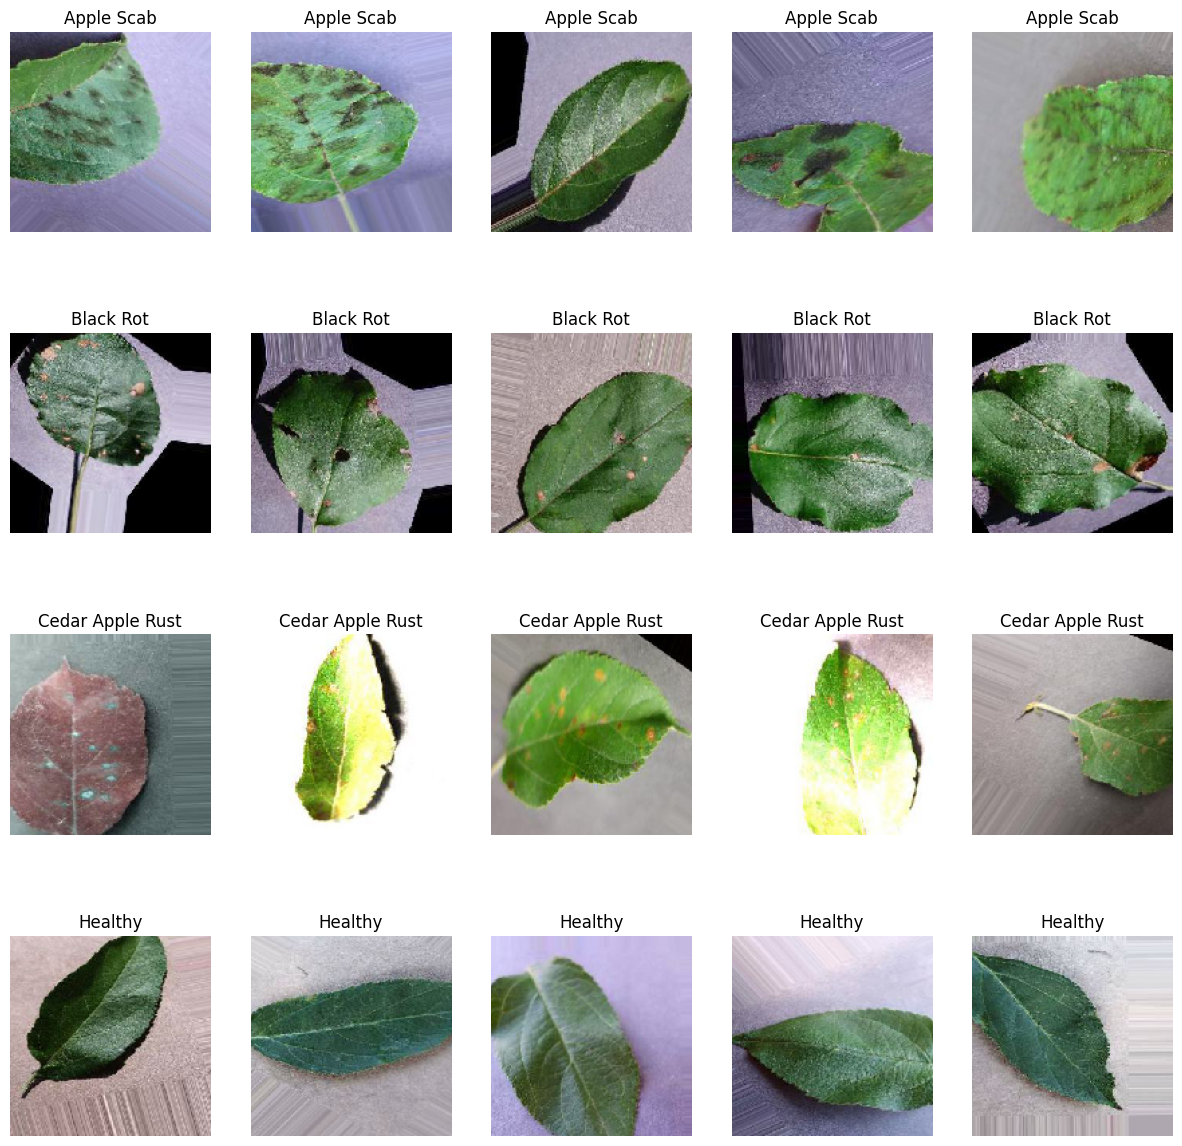

Gambar dari Dataset Validation:


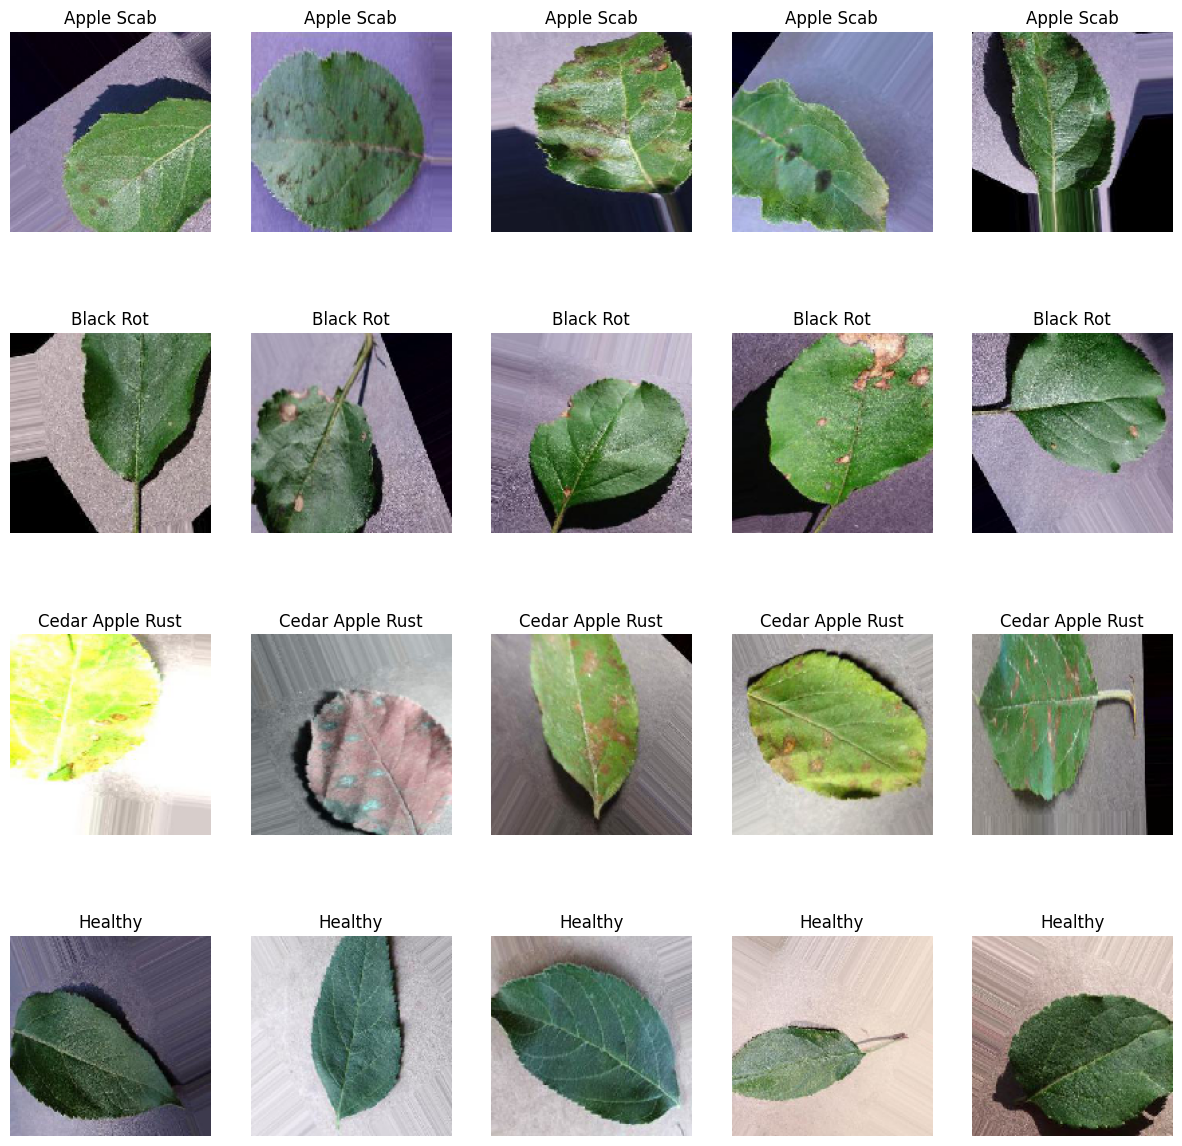

In [45]:
def plot_images_by_class(folder_path, class_names, num_images_per_class=5):
    plt.figure(figsize=(15, 15))
    
    for class_name in class_names:
        class_folder = os.path.join(folder_path, class_name)
        image_paths = [str(img_path) for img_path in pathlib.Path(class_folder).glob('*.jpeg')]
        
        selected_images = random.sample(image_paths, num_images_per_class)
        
        for i, img_path in enumerate(selected_images):
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            
            plt.subplot(len(class_names), num_images_per_class, class_names.index(class_name)*num_images_per_class + i + 1)
            plt.imshow(img_array.astype("uint8"))
            plt.axis("off")
            plt.title(class_name)
    
    plt.show()

output_train_folder = "C:/Users/nabil/Downloads/apelbil/data/aug_train"
output_val_folder = "C:/Users/nabil/Downloads/apelbil/data/aug_val"

class_names = ['Apple Scab', 'Black Rot', 'Cedar Apple Rust', 'Healthy']

print("Gambar dari Dataset Training:")
plot_images_by_class(output_train_folder, class_names, num_images_per_class=5)

print("Gambar dari Dataset Validation:")
plot_images_by_class(output_val_folder, class_names, num_images_per_class=5)

# Parameter

In [47]:
IMG_SIZE = (256, 256)
IMG_SHAPE = (IMG_SIZE[0], IMG_SIZE[1], 3)  

# Architecture Model

In [49]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=IMG_SHAPE),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    
    layers.Dense(4, activation='softmax')
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

C:\Users\nabil\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,840,388 (56.61 MB)

 Trainable params: 14,839,940 (56.61 MB)

 Non-trainable params: 448 (1.75 KB)

# Callbacks

In [51]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') is not None and logs.get('val_accuracy') >= 0.92:
            print("\nAkurasi validasi sudah mencapai 92%, menghentikan pelatihan!")
            self.model.stop_training = True

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [55]:
BATCH_SIZE = 32  

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    validation_steps=len(val_generator) // BATCH_SIZE,
    callbacks=callbacks
)

Epoch 1/30
331/331 ━━━━━━━━━━━━━━━━━━━━ 860s 3s/step - accuracy: 0.6252 - loss: 8.9327 - val_accuracy: 0.2708 - val_loss: 34.5674
Epoch 2/30
331/331 ━━━━━━━━━━━━━━━━━━━━ 829s 3s/step - accuracy: 0.7406 - loss: 3.1667 - val_accuracy: 0.6042 - val_loss: 4.1681
Epoch 3/30
331/331 ━━━━━━━━━━━━━━━━━━━━ 831s 3s/step - accuracy: 0.8160 - loss: 2.3684 - val_accuracy: 0.7500 - val_loss: 2.2044
Epoch 4/30
331/331 ━━━━━━━━━━━━━━━━━━━━ 825s 2s/step - accuracy: 0.8288 - loss: 2.7346 - val_accuracy: 0.7708 - val_loss: 3.6449
Epoch 5/30
331/331 ━━━━━━━━━━━━━━━━━━━━ 823s 2s/step - accuracy: 0.8669 - loss: 2.1945 - val_accuracy: 0.7500 - val_loss: 3.2084
Epoch 6/30
331/331 ━━━━━━━━━━━━━━━━━━━━ 989s 3s/step - accuracy: 0.8873 - loss: 2.0347 - val_accuracy: 0.8021 - val_loss: 3.0720
Epoch 7/30
331/331 ━━━━━━━━━━━━━━━━━━━━ 1054s 3s/step - accuracy: 0.9028 - loss: 1.7950 - val_accuracy: 0.9479 - val_loss: 1.6101
Epoch 8/30
331/331 ━━━━━━━━━━━━━━━━━━━━ 1051s 3s/step - accuracy: 0.9108 - loss: 1.8151 - val_a

# Plot Training & Validation

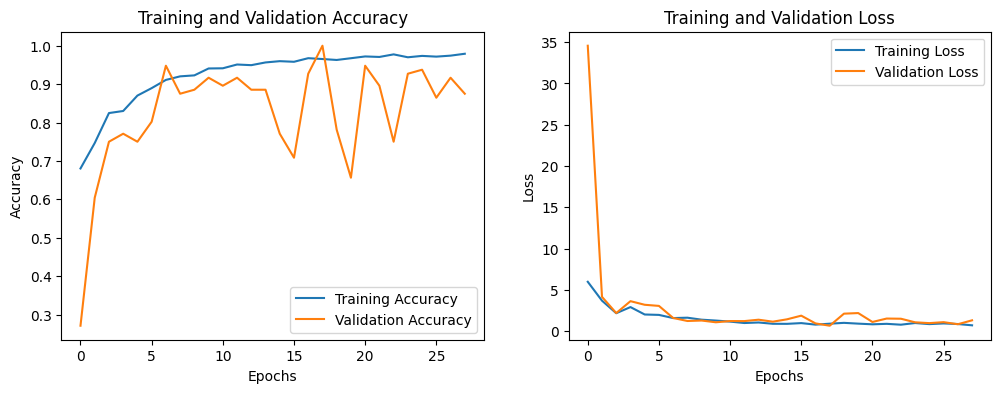

In [57]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()